In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Year_wise.csv to Year_wise.csv


In [2]:
rice = pd.read_csv("Year_wise.csv", index_col='Element')
rice.shape

(59, 11)

In [3]:
rice.head(3).append(rice.tail(3))

,Aman_Rice,AUS_Rice,Boro_Rice,Gross_Area,Aman_Production,AUS_Production,Boro_Production,Total_Production,Average_Yield_Rate,Temperature,Rainfall
Element,,,,,,,,,,,
1961,48.34,28.8,7.66,84.80,78.54,37.40,14.97,130.91,1.540,25.18,211.68
1962,49.53,29.5,7.87,86.90,72.44,34.49,12.59,120.73,1.390,25.16,179.08
1963,51.36,30.6,8.14,90.10,86.76,41.31,16.53,144.60,1.600,25.28,189.57
2017,NaN,NaN,NaN,115.15,NaN,NaN,NaN,441.36,3.832,25.50,228.56
2018,NaN,NaN,NaN,115.16,NaN,NaN,NaN,443.79,3.853,25.11,151.89
2019,NaN,NaN,NaN,115.17,NaN,NaN,NaN,445.33,3.866,25.44,169.11


In [4]:
rice.nunique()

Aman_Rice             53
AUS_Rice              54
Boro_Rice             54
Gross_Area            56
Aman_Production       54
AUS_Production        53
Boro_Production       54
Total_Production      59
Average_Yield_Rate    59
Temperature           43
Rainfall              58
dtype: int64

Aman_Rice             5
AUS_Rice              5
Boro_Rice             5
Gross_Area            0
Aman_Production       5
AUS_Production        5
Boro_Production       5
Total_Production      0
Average_Yield_Rate    0
Temperature           0
Rainfall              0
dtype: int64


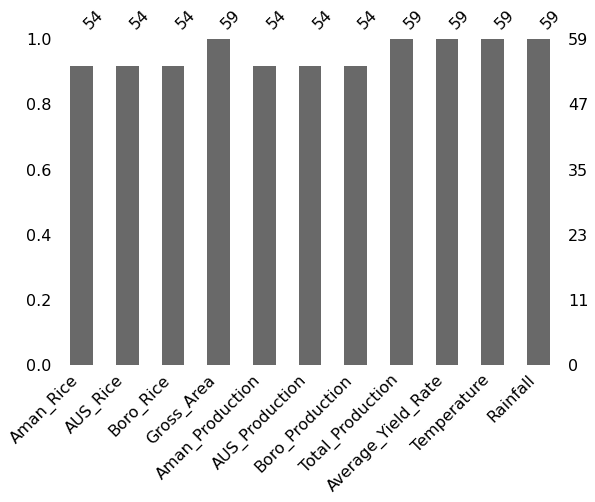

In [5]:
import missingno as msno
print(rice.isnull().sum())

p = msno.bar(rice, figsize = (9,6))

In [6]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1961 to 2019
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Aman_Rice           54 non-null     float64
 1   AUS_Rice            54 non-null     float64
 2   Boro_Rice           54 non-null     float64
 3   Gross_Area          59 non-null     float64
 4   Aman_Production     54 non-null     float64
 5   AUS_Production      54 non-null     float64
 6   Boro_Production     54 non-null     float64
 7   Total_Production    59 non-null     float64
 8   Average_Yield_Rate  59 non-null     float64
 9   Temperature         59 non-null     float64
 10  Rainfall            59 non-null     float64
dtypes: float64(11)
memory usage: 5.5 KB


In [21]:
rice['Aman_Rice'].fillna(method = 'ffill', inplace = True)
rice['Aman_Rice'] = rice['Aman_Rice'].astype('int64')

rice['AUS_Rice'].fillna(method = 'ffill', inplace = True)
rice['AUS_Rice'] = rice['AUS_Rice'].astype('int64')

rice['Boro_Rice'].fillna(method = 'ffill', inplace = True)
rice['Boro_Rice'] = rice['Boro_Rice'].astype('int64')

rice['Aman_Production'].fillna(method = 'ffill', inplace = True)
rice['Aman_Production'] = rice['Aman_Production'].astype('int64')

rice['AUS_Production'].fillna(method = 'ffill', inplace = True)
rice['AUS_Production'] = rice['AUS_Production'].astype('int64')

rice['Boro_Production'].fillna(method = 'ffill', inplace = True)
rice['Boro_Production'] = rice['Boro_Production'].astype('int64')

In [7]:
col = rice.columns.tolist()
#col.remove('Aman_Rice')
rice[col].describe(percentiles = [.25, .5, .75, .95, .97, .99])

,Aman_Rice,AUS_Rice,Boro_Rice,Gross_Area,Aman_Production,AUS_Production,Boro_Production,Total_Production,Average_Yield_Rate,Temperature,Rainfall
count,54.000000,54.000000,54.000000,59.000000,54.000000,54.000000,54.000000,59.000000,59.000000,59.000000,59.000000
mean,55.987222,22.564074,23.910185,103.282542,90.046111,26.053333,72.745185,209.595763,1.980475,25.415254,191.057627
std,2.962518,9.252562,14.575347,7.368179,20.114124,8.704590,60.919653,98.175834,0.790182,0.350351,23.404344
min,48.340000,9.060000,7.660000,84.800000,55.870000,11.160000,12.590000,97.760000,1.031000,24.680000,143.150000
25%,54.760000,12.642500,10.555000,99.005000,75.005000,18.560000,21.380000,135.990000,1.372000,25.160000,177.485000
50%,56.705000,27.365000,22.010000,103.140000,86.265000,23.375000,52.810000,176.870000,1.711000,25.400000,189.570000
75%,57.692500,31.315000,37.687500,106.840000,101.845000,31.657500,118.822500,263.600000,2.473000,25.615000,211.775000
95%,60.187000,33.295000,47.825500,115.181000,128.326500,42.055500,187.656500,422.226000,3.695200,25.973000,224.622000
97%,60.346400,33.861900,47.987900,115.285200,129.486600,43.718800,188.718900,441.991800,3.837460,26.213800,228.256600
99%,60.445200,34.609500,48.241000,115.657000,131.014900,45.323200,190.939500,444.436800,3.858460,26.360400,234.939800


In [8]:
pd.DataFrame(rice.groupby(['Temperature', 'Rainfall']) ['Average_Yield_Rate'].count())

Average_Yield_Rate
Temperature Rainfall                    
24.68       177.08                     1
24.93       145.13                     1
            221.39                     1
24.98       197.12                     1
            223.93                     1
25.04       183.21                     1
            216.07                     1
25.07       190.85                     1
25.08       218.03                     1
25.10       181.23                     1
25.11       151.89                     1
25.12       198.38                     1
25.13       168.59                     1
25.16       179.08                     1
            185.38                     1
            198.27                     1
25.18       211.68                     1
25.19       143.15                     1
25.20       166.01                     1
            224.23                     1
25.22       178.98                     1
25.25       243.75                     1
25.26       211.87                     1
25.27       220.73                     1
25.28       189.57                     1
            191.50                     1
            212.16                     1
25.29       149.68                     1
25.37       189.28                     1
25.40       150.19                     1
25.41       201.47                     1
            215.78                     1
25.42       183.89                     1
25.44       165.15                     1
            169.11                     1
            209.28                     1
25.49       177.89                     1
            210.46                     1
25.50       178.98                     1
            228.56                     1
25.53       186.48                     1
25.58       181.96                     1
            195.57                     1
25.60       195.17                     1
25.63       187.24                     1
25.68       181.65                     1
25.69       164.19                     1
25.73       176.64                     1
            220.88                     1
25.79       212.39                     1
            228.15                     1
25.82       190.22                     1
25.85       191.23                     1
25.86       168.35                     1
25.89       207.14                     1
25.95       212.65                     1
26.18       160.65                     1
26.31       187.23                     1
26.43       165.63                     1